In [1]:
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,8)

In [2]:
def resize_keep_ratio(image, max_size):
    h, w = image.shape[:2]

    if h > w:
        r = h / max_size
        new_w = int(w / r)
        new_h = max_size
    else:
        r = w / max_size
        new_h = int(h / r)
        new_w = max_size
    return cv2.resize(image, (new_w, new_h))

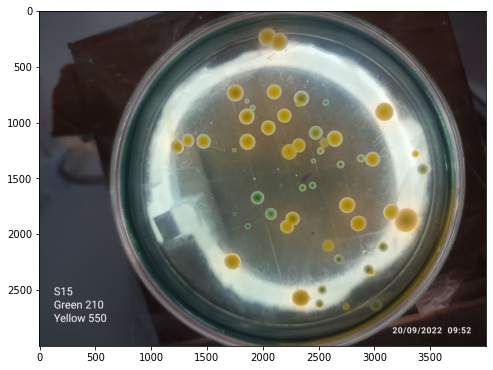

In [3]:
filename = '../dataset/16-53-vibrio.jpg'
img = cv2.imread(filename)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Filter HSV Color to get Yellow Vibrio

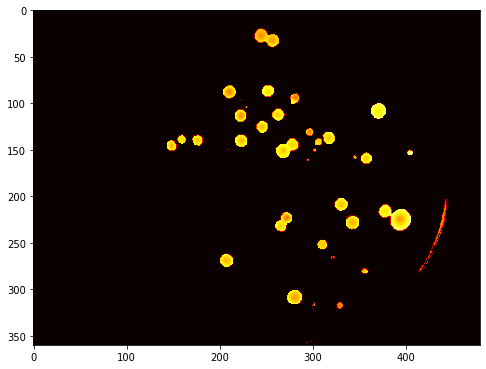

In [4]:
lower_yellow = np.array([15, 120, 110])
upper_yellow = np.array([36, 255, 255])

img_res = resize_keep_ratio(img, 480) # resize to 480 * 480 pixel size
# img_res = cv2.blur(img_res, (5, 5))
hsv_image = cv2.cvtColor(img_res, cv2.COLOR_BGR2HSV) # convert BGR image to HSV for color descriptor
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow) # create yellow mask range

masked_image = cv2.bitwise_and(img_res, img_res, mask = yellow_mask)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

plt.imshow(masked_image, cmap='hot')

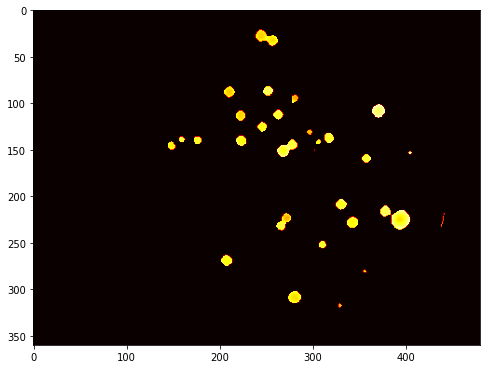

In [5]:
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(masked_image, kernel, iterations=1)
plt.imshow(img_erosion, cmap='hot')

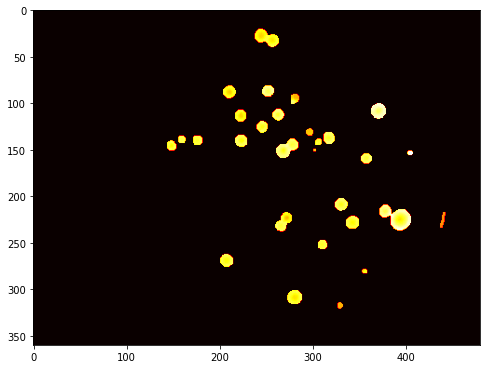

In [6]:
kernel = np.ones((3, 3), np.uint8)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
plt.imshow(img_dilation, cmap='hot')

Detected contour: 28


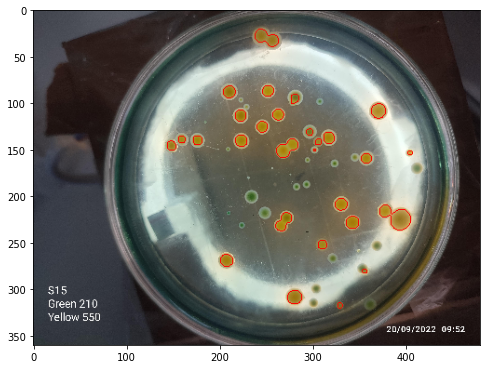

In [7]:
contour_list = []
contours, _= cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i, cnt in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = w / h
    if 0.5 <= aspect_ratio <= 1.5 :
        contour_list.append(cnt)

print('Detected contour: {}'.format(len(contour_list)))

img_osd = img_res.copy()
img_osd = cv2.cvtColor(img_osd, cv2.COLOR_BGR2RGB)
img_osd = cv2.drawContours(img_osd, contour_list,  -1, (255,0,0), 1)
plt.imshow(img_osd)

## Filter HSV Color to get Green Vibrio

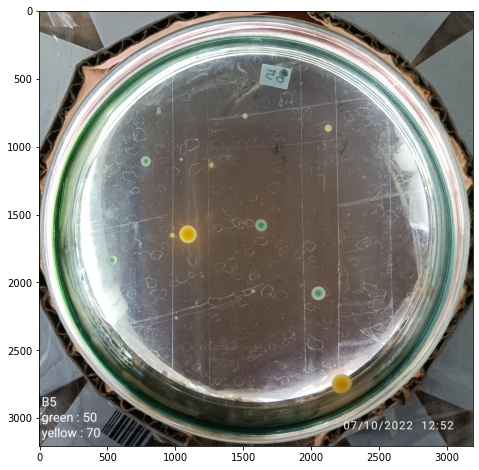

In [9]:
filename = '../dataset/10-11-vibrio.jpg'
img = cv2.imread(filename)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

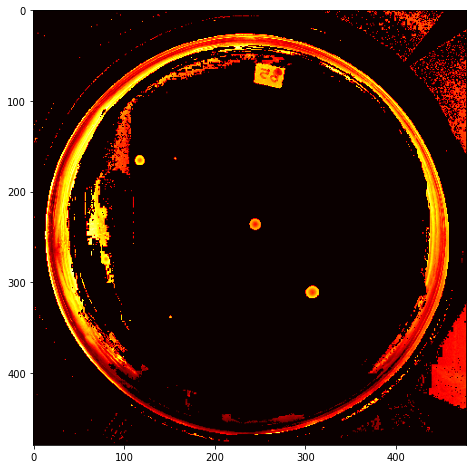

In [10]:
lower_green = np.array([40, 20, 40])
upper_green = np.array([100, 250, 255])

img_res = resize_keep_ratio(img, 480) # resize to 480 * 480 pixel size
# img_res = cv2.blur(img_res, (5, 5))
hsv_image = cv2.cvtColor(img_res, cv2.COLOR_BGR2HSV) #convert BGR image to HSV for color descriptor
green_mask = cv2.inRange(hsv_image, lower_green, upper_green) # create green mask range

masked_image = cv2.bitwise_and(img_res, img_res, mask = green_mask)
masked_image = cv2.cvtColor(masked_image, cv2.COLOR_BGR2GRAY)

plt.imshow(masked_image, cmap='hot')

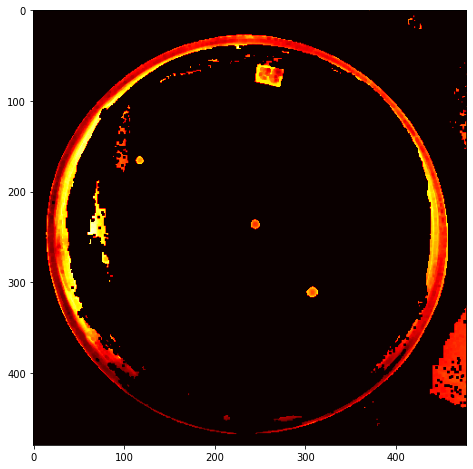

In [11]:
kernel = np.ones((3, 3), np.uint8)
img_erosion = cv2.erode(masked_image, kernel, iterations=1)
plt.imshow(img_erosion, cmap='hot')

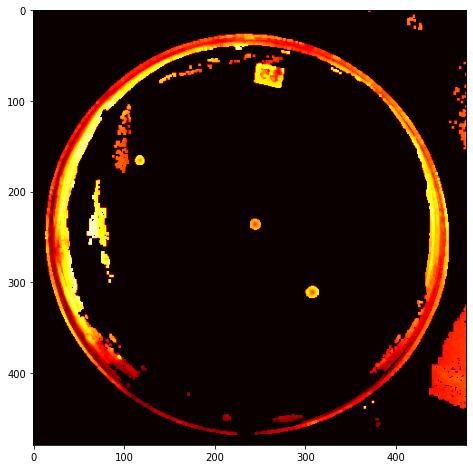

In [12]:
kernel = np.ones((3, 3), np.uint8)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
plt.imshow(img_dilation, cmap='hot')

Detected contour: 81


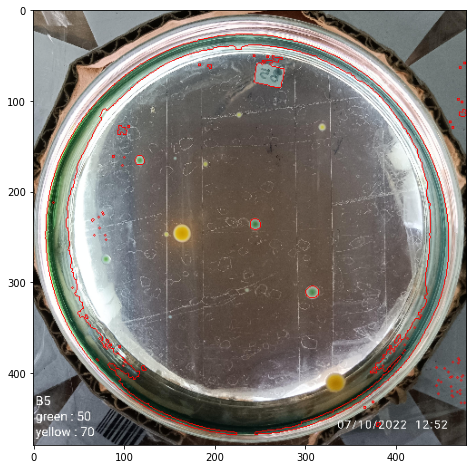

In [13]:
contour_list = []
contours, _= cv2.findContours(img_dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for i, cnt in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = w / h
    if 0.9 <= aspect_ratio <= 1.1 :
        contour_list.append(cnt)
#     else:
#         print(i, aspect_ratio)

print('Detected contour: {}'.format(len(contour_list)))

img_osd = img_res.copy()
img_osd = cv2.cvtColor(img_osd, cv2.COLOR_BGR2RGB)
img_osd = cv2.drawContours(img_osd, contour_list,  -1, (255,0,0), 1)
plt.imshow(img_osd)